<h1 style="font-size:35pt">ASOC and UniChurch playground</h1>

# Table of Contents
1. [Introduction](#Introduction)
    1. [Packages](#Packages)
    2. [Read Sheets](#Read_Sheets)
    3. [Display Sheets](#Display_Sheets)
3. [Locations](#Locations)
4. [Route maps](#Routes)


## Introduction
<div id='Intro'/>


### Packages 

In [104]:
import folium
import pandas as pd
import gpxpy
import os

import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString
import numpy as np
import geopandas as gpd


### Read Sheets
The sheets are identified using the google identifciation number.(gid)
- `Contents`:  gid=1252950902
- `ASOC Walks and Locations`: gid=0
- `Church and Caregroup Locations`: gid=1720331646

These gid values were found using the url of the respective sheet. 

In [193]:
### Display Sheets

In [199]:
gids = [1252950902, 0, 1720331646]


sheet_url = "https://docs.google.com/spreadsheets/d/1mGR_xugxcg3Pc3e1KLzggZn6XfnSJOuHncZ64hOo8M4/export?format=csv"


df = [pd.read_csv(f'{sheet_url}&gid={gid}') for gid in gids]
display(df[0].head())
display(df[1].head())
display(df[2].head())

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,ASOC Walks
3,NaN,Church anbd


,Name,Latitude,Longitude,Google_Link,Address,Description,Route_Links,Icon,Colour
0,Awabakal Nature Reserve,-32.991495,151.722283,"https://www.google.com/maps/place/13+Ivy+St,+D...","13 Ivy St, Dudley NSW 2290","It will be in the bush, so pls have proper wal...",NaN,flag,blue
1,Bar Beach,-32.940471,151.769567,https://www.google.com/maps/place/Yuelarbah+Tr...,"Yuelarbah Track, Bar Beach NSW 2300",NaN,NaN,umbrella-beach,beigh
2,Blackbutt/Richely Reserve,-32.931901,151.704362,https://www.google.com/maps/place/32°55'55.6%2...,"26-4 Mahogany Dr, New Lambton NSW 2305",NaN,NaN,tree,green
3,Blacksmiths Playground,-33.080611,151.656147,https://www.google.com/maps/place/Blacksmiths+...,"128 Ungala Rd, Blacksmiths NSW 2281",NaN,NaN,flag,blue
4,Blue Gums Hills,-32.883995,151.621271,https://www.google.com/maps/place/Village+Gree...,"4J8C+8G, Minmi NSW 2287",The walk is on gravel in the bushes with sligh...,NaN,mountain,darkgreen


,Name,Latitude,Longitude,Address,Google_Link,Route_Link,Desciption,Icon,Colour
0,ES Building,NaN,NaN,"Ring Rd, Callaghan NSW 2308",NaN,NaN,NaN,house,orange
1,Basden Theate,-32.893586,-32.893586,"Ring Rd, Callaghan NSW 2308","https://www.google.com/maps/place/Parking+lot,...",NaN,NaN,house,orange
2,Nuspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create subfolders with name of locations

In [259]:
def create_folders(df, column_name, base_directory):
    """3"""
    if os.path.exists(base_directory):
        print("This folder already exists!")
    else:
        os.makedirs(base_directory)

    for name in df[column_name]:
        os.makedirs(f'{base_directory}/{name}')



In [261]:
#base_directory = "GPX_Routes/Sabbath_Walks/"
base_directory = "Maps/Sabbath_Walks/"
column_name = "Name"
create_folders(df, column_name, base_directory)

In [252]:
for name in df[column_name]:
    print(name)

Awabakal Nature Reserve
Bar Beach
Blackbutt/Richely Reserve
Blacksmiths Playground
Blue Gums Hills
Carrington Boat Ramp
Caves Beach
Croundace Bay Park
Elebana Park
Fern Bay
Fernleigh Cafe
Green Point
Hickson Street Lookout
Islington Park
Koorangang Wetlands
Macquarie Hills
Mount Sugarloaf
Munibung Hills
Nobby Breakwall
Pirrita island carpark and foreshore
Speers Point Boat Ramp
Stockton Foreshore
Stoney Creek
Swansea Beach
TJ's House
Tramway Trail
Walka Water Works
Yuelarbah Trail


## Locations

In [238]:
# Google Sheets URL

sheet_url = "https://docs.google.com/spreadsheets/d/1mGR_xugxcg3Pc3e1KLzggZn6XfnSJOuHncZ64hOo8M4/export?format=csv&gid=0"

# Read the data into a DataFrame
df = pd.read_csv(sheet_url)
df

# Extract data from the DataFrame
names = df['Name'].tolist()
locations = df[['Latitude', 'Longitude']].values.tolist()
links = df['Google_Link'].tolist()
routes = df['Route_Link'].tolist()
addresses = df['Address'].tolist()
descriptions = df['Description'].tolist()
lengths = df['Length']
icons = df['Icon'].tolist()
colours = df['Colour'].tolist()

# Create a map centered around the first location 
m = folium.Map(location=(-32.95, 151.7), zoom_start=11) 

# Add markers for each location
for name, loc, link, route, address, desc, len, icon, colour in zip(names, locations, links, routes, addresses, descriptions, lengths, icons, colours):
    # Set a default icon if the icon field is blank
    if pd.isna(icon) or icon == "":
        icon = 'info-sign'  # Default icon

    # Replaces NaN with empty strings
    desc = "" if pd.isna(desc) else desc
    route = "" if pd.isna(route) else route

    custom_icon = folium.Icon(color = colour, icon=icon, prefix='fa')


    folium.Marker(
        location=loc,
        popup=f"<b>{name}</b><br><a href='{route}' target='_blank'>Route Map Link</a><br>{desc}",
        tooltip=name,
        icon = custom_icon
    ).add_to(m)

m

/var/folders/pt/kkxzl8252bj57r_h2w9w4rf00000gn/T/ipykernel_63959/1580895692.py:33: UserWarning: color argument of Icon should be one of: {'darkblue', 'blue', 'purple', 'darkgreen', 'red', 'white', 'darkpurple', 'lightred', 'gray', 'orange', 'beige', 'lightgray', 'lightblue', 'darkred', 'pink', 'black', 'lightgreen', 'cadetblue', 'green'}.
  custom_icon = folium.Icon(color = colour, icon=icon, prefix='fa')


In [71]:
Locations[0]


[-32.924156832584664, 151.791283616395]

In [202]:
import folium
import pandas as pd

# Google Sheets URL


sheet_url = 'https://docs.google.com/spreadsheets/d/4mGR_xugxcg3Pc3e1KLzggZn6XfnSJOuHncZ64hOo8M4/export?format=csv'

# Read the data into a DataFrame
df = pd.read_csv(sheet_url)
df

# Extract data from the DataFrame
names = df['Name'].tolist()
locations = df[['Latitude', 'Longitude']].values.tolist()
links = df['Link'].tolist()
addresses = df['Address'].tolist()
descriptions = df['Description'].tolist()
routes = df['Routes'].tolist()

# Create a map centered around the first location
m = folium.Map(location=(-32.9, 151.79), zoom_start=10)

# Add markers for each location
for name, loc, link, address, desc, route in zip(names, locations, links, addresses, descriptions, routes):
    folium.Marker(
        location=loc,
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{address}<br>{desc}<br><a href='{route}' target='_blank'>Route Map Link</a>",
        tooltip=name
    ).add_to(m)

# Save the map as an HTML file
html_file = 'Maps/ASOC_walk_locations_map.html'
m.save(html_file)

print(f"Map has been saved to {html_file}")

HTTPError: HTTP Error 404: Not Found

In [173]:
df

,Name
0,Latatude
1,Longitude
2,Links
3,Addresses
4,Descriptions


In [52]:


# Create a map centered around the first location
m = folium.Map(location=Locations[0], zoom_start=15)

# Add markers for each location
for name, loc, link, address, desc in zip(Names, Locations, Links, Addresses, Descriptions):
    folium.Marker(
        location=loc,
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{address}<br>{desc}",
        tooltip=name
    ).add_to(m)

# Save the map as an HTML file
#m.save('locations_map.html')

# Display the map
m

## Route maps
<div id='Routes'/>


In [67]:
m = folium.Map(location=map_center, zoom_start=14)

# Read the GPX file
with open('Strava_Routes/ASOC 1.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Extract route coordinates
for track in gpx.tracks:
    for segment in track.segments:
        coords = [(point.latitude, point.longitude) for point in segment.points]
        folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)

# Add markers for the start and end points of the route
if coords:
    folium.Marker(coords[0], popup="Start", icon=folium.Icon(color='green')).add_to(m)
    folium.Marker(coords[-1], popup="End", icon=folium.Icon(color='red')).add_to(m)

# Save the map as an HTML file
m.save('strava_route_map.html')
m

In [113]:
def create_map(gpx, name, zoom):
    m = folium.Map(location=[float(locations[0][0]), float(locations[0][1])], zoom_start=zoom)

    folium.TileLayer('openstreetmap').add_to(m)

    # Read the GPX file
    with open(gpx, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    # Extract route coordinates
    for track in gpx.tracks:
        for segment in track.segments:
            coords = [(point.latitude, point.longitude) for point in segment.points]
            folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)

    # Add markers for the start and end points of the route
    if coords:
        folium.Marker(coords[0], popup="Start", icon=folium.Icon(color='green')).add_to(m)
        folium.Marker(coords[-1], popup="End", icon=folium.Icon(color='red')).add_to(m)

    # Save the map as an HTML file
    m.save(name)


In [111]:
gpx = "GPX_Routes/Mount Sugarloaf summit walk.gpx"
create_map(gpx, "Funny.html")

## Church Location maps

In [115]:
gpx = "GPX_Routes/ASOC Library_Basden Theatre (BA) Church.gpx"
create_map(gpx, "Church_Locations/Libary.html", 15)

In [121]:
import folium
import gpxpy

# Path to the GPX file
gpx_file = 'GPX_Routes/ASOC Library_Basden Theatre (BA) Church.gpx'

# Parse the GPX file
with open(gpx_file, 'r') as f:
    gpx = gpxpy.parse(f)

# Extract coordinates from the GPX file
route = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route.append((point.latitude, point.longitude))

# Create a map centered around the first point of the GPX route
if route:
    start_point = route[0]
else:
    start_point = [0, 0]

m = folium.Map(location=start_point, zoom_start=20)

# Add the GPX route to the map
folium.PolyLine(route, color='blue', weight=2.5, opacity=1).add_to(m)

# Save the map as an HTML file
#html_file = 'Library_Church.html'
#m.save(html_file)

#print(f"Map has been saved to {html_file}")
m


In [162]:
"""
gpx - The file name.
name - Name of file.
start_marker  -                 {"name": "Libray", "link":"www.something.com", "flag":"fire"}
map_settings -
"""

def create_map_with_markers(gpx, name, map_setings, start_marker,):
    name = start_marker["name"]
    link = start_marker["link"]
    icon = start_marker["icon"]
    colour = start_marker["colour"]
    desciption = start_marker["desciption"]

    centre, zoom = map_setings

    # Extract coordinates from the GPX file
    route = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                route.append((point.latitude, point.longitude))

    # Create a map centered around the first point of the GPX route
    if route:
        start_point = route[centre]
    else:
        start_point = [0, 0]

    # Initalise map layer
    m = folium.Map(location=start_point, zoom_start=zoom)

    # Add the GPX route to the map
    folium.PolyLine(route, color='blue', weight=2.5, opacity=1).add_to(m)

    # Make marker Icon
    custom_icon = folium.Icon(color = colour, icon=icon, prefix='fa')

    # Add start marker to the map
    folium.Marker(
        location=route[0],
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{desciption}",
        tooltip=name,
        icon = custom_icon
    ).add_to(m)


    # Save the map as an HTML file
    #html_file = 'Library_Church.html'
    #m.save(html_file)

    #print(f"Map has been saved to {html_file}")
    return m


In [165]:
# Path to the GPX file
gpx_file = 'GPX_Routes/ASOC Library_Basden Theatre (BA) Church.gpx'

start = {"name": "Libray", "link":"www.something.com", "centre":5, "icon":"square-parking", 
         "colour":"blue", "desciption":"Follow path to the Basden Theatre"}

map = [5,25]
m = create_map_with_markers(gpx, "Church_Locations/Libary2.html", map, start)
m

## Image Conversion

Converts pdf images to png. This is important for marking icons.

In [ ]:
def 

In [171]:
from pdf2image import convert_from_path

# Path to the PDF file
pdf_path = 'Pictures/ASOC-Logo-orange.pdf'

# Convert PDF to PNG
images = convert_from_path(pdf_path)
# Save the first page as PNG (assuming the PDF has only one page)
image_path = 'Pictures/ASOC-Logo-orange.png'
images[0].save(image_path, 'PNG')

ASOC_Logo aspect ratio: 2188:1014

In [179]:
ratio = 2188/1025
70/ratio

32.79250457038391

In [ ]:
# Initalise map layer
    m = folium.Map(location=start_point, zoom_start=zoom)

# Add start marker to the map
    folium.Marker(
        location=route[0],
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{desciption}",
        tooltip=name,
        icon = custom_icon
    ).add_to(m)

# OSMinx

## Display boundaries in newcastle

In [124]:
# Search for all administrative boundaries in Newcastle, NSW, Australia
place_name = "Newcastle, New South Wales, Australia"
tags = {"boundary": "administrative"}

# Get the boundaries
gdf = ox.geometries_from_place(place_name, tags)

# Display the names of the administrative areas
gdf.head()

/var/folders/pt/kkxzl8252bj57r_h2w9w4rf00000gn/T/ipykernel_6416/2531579108.py:6: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place_name, tags)


name name:en   name:ja name:zh   place  \
element_type osmid                                                       
relation     5989880  Newcastle East     NaN  ニューカッスル東     NaN  suburb   
             5989933       Newcastle     NaN   ニューカッスル    纽卡斯尔  suburb   
             5989984        The Hill     NaN       ザヒル     NaN  suburb   
             5991723      Cooks Hill     NaN    クックスヒル     NaN  suburb   
             6005496        Stockton     NaN    ストックトン     NaN  suburb   

                     website wikidata  \
element_type osmid                      
relation     5989880     NaN      NaN   
             5989933     NaN   Q57278   
             5989984     NaN      NaN   
             5991723     NaN      NaN   
             6005496     NaN      NaN   

                                                               geometry  \
element_type osmid                                                        
relation     5989880  POLYGON ((151.78561 -32.92646, 151.78501 -32.9...   
             5989933  POLYGON ((151.75970 -32.91770, 151.75991 -32.9...   
             5989984  POLYGON ((151.77125 -32.93417, 151.77205 -32.9...   
             5991723  POLYGON ((151.76123 -32.93563, 151.76130 -32.9...   
             6005496  POLYGON ((151.77912 -32.90868, 151.77914 -32.9...   

                                source  \
element_type osmid                       
relation     5989880  NSW LPI Base Map   
             5989933  NSW LPI Base Map   
             5989984  NSW LPI Base Map   
             5991723  NSW LPI Base Map   
             6005496  NSW LPI Base Map   

                                                                  nodes  ...  \
element_type osmid                                                       ...   
relation     5989880  [[[728801284, 8095302378, 8092105584, 54925354...  ...   
             5989933  [[[8392314761, 8392314696, 8392314636, 8424239...  ...   
             5989984  [[[4014369603, 4014369602, 4014369600, 4014369...  ...   
             5991723  [[[4014365370, 4014365371, 4014365372, 4014365...  ...   
             6005496  [[[827236173, 8392314761], [827228187, 8392314...  ...   

                     postal_code ref:nswlpi:cadid ref:psma:loc_pid      type  \
element_type osmid                                                             
relation     5989880        2300        108029779          NSW2976  boundary   
             5989933        2300        158461737          NSW2975  boundary   
             5989984        2300        108033249          NSW3860  boundary   
             5991723        2300        108029776          NSW1032  boundary   
             6005496        2295        108032093          NSW3697  boundary   

                     alt_name email nswlpi:cadid phone ref:psma:lga_pid  \
element_type osmid                                                        
relation     5989880      NaN   NaN          NaN   NaN              NaN   
             5989933      NaN   NaN          NaN   NaN              NaN   
             5989984      NaN   NaN          NaN   NaN              NaN   
             5991723      NaN   NaN          NaN   NaN              NaN   
             6005496      NaN   NaN          NaN   NaN              NaN   

                     short_name  
element_type osmid               
relation     5989880        NaN  
             5989933        NaN  
             5989984        NaN  
             5991723        NaN  
             6005496        NaN  

[5 rows x 24 columns]

In [126]:
gdf.name

element_type  osmid  
relation      5989880            Newcastle East
              5989933                 Newcastle
              5989984                  The Hill
              5991723                Cooks Hill
              6005496                  Stockton
              6005680        Newcastle-Maitland
              6026840                Carrington
              6026856            Newcastle West
              6026858                 Kooragang
              6026861               Tighes Hill
              6026866                   Wickham
              6189831    Newcastle City Council
Name: name, dtype: object

<Axes: >

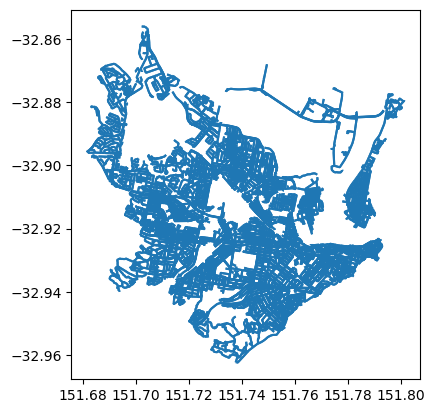

In [129]:
g = gpd.read_file("Letterbox_Maps/GeoJSON/All_Newcastle.geojson")
g.plot()

In [128]:
# Create a folium map
map_center = [-32.88, 151.69]  # Center of Newcastle
m = folium.Map(location=map_center, zoom_start=14)

# Function to add GeoDataFrame to folium map
def add_gdf_to_map(gdf, color, folium_map):
    for _, row in gdf.iterrows():
        folium.GeoJson(row['geometry'], style_function=lambda x, color=color: {'color': color}).add_to(folium_map)

# Add nodes and edges to the map
colors = ['blue', 'green', 'red']
for nodes_gdf, edges_gdf, color in zip(nodes_gdfs, edges_gdfs, colors):
    #add_gdf_to_map(nodes_gdf, color, m)
    add_gdf_to_map(edges_gdf, color, m)

# Save the map to an HTML file
m#.save("newcastle_grids.html")


<Axes: >

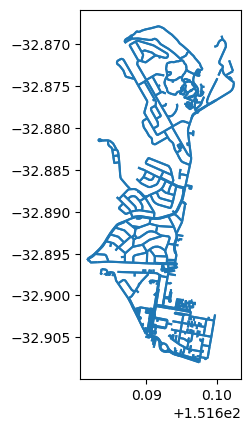

In [57]:
merged_edges_gdf.plot()

In [51]:
Newcastle = ox.graph_from_place("Newcastle, Australia", network_type='walk')

<Axes: >

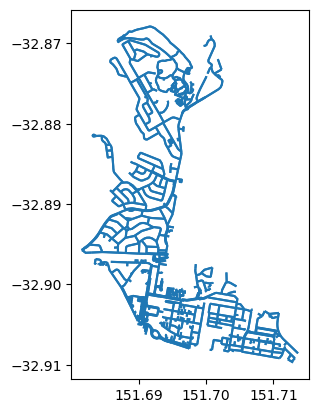

In [123]:
gdf =edges#.set_geometry(col='geometry', inplace=True)
#gdf.to_file('dataframe.shp') 
#gdf.to_file("filename.geojson", driver='GeoJSON')
#gdf.to_file('Letterboxing_Maps/file.shp', driver='ESRI Shapefile')
gdf
#import geopandas as gpd
g = gpd.read_file("Letterbox_Maps/GeoJSON/MAP2.geojson")
g.plot()

<Axes: >

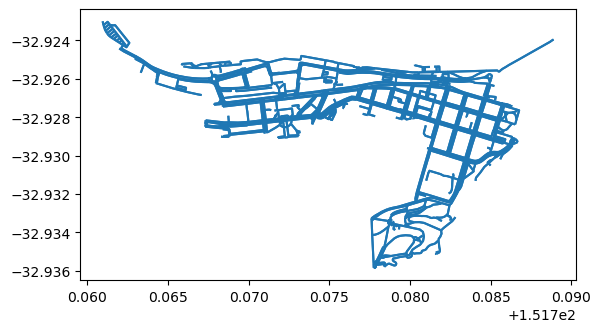

In [53]:
edges.plot()